In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
import time
import sklearn
import tensorflow as tf
from tensorflow import keras
import pandas as pd

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd,  sklearn, tf, keras:
    print(module.__name__, module.__version__)

/run/media/260254/dde9f86c-29a3-45bf-850a-5d24236399e0/studyPython/environment/tf2_py3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/run/media/260254/dde9f86c-29a3-45bf-850a-5d24236399e0/studyPython/environment/tf2_py3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


2.1.0
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
matplotlib 3.1.3
numpy 1.18.1
pandas 1.0.1
sklearn 0.22.2
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
# datasets 存储在home/.keras/datasets/
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
print(np.max(x_train), np.min(x_train))

255 0


In [4]:
# 对数据进行标准化 (x - u) /std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1, 28,28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28, 28)


In [5]:
print(np.max(x_train_scaled),np.min(x_train_scaled))

2.0231433 -0.8105136


In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [7]:
history = model.fit(x_train_scaled, y_train, epochs = 10, validation_data = [x_valid_scaled, y_valid])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 51us/sample - loss: 0.5372 - accuracy: 0.8105 - val_loss: 0.4400 - val_accuracy: 0.8460
Epoch 2/10
55000/55000 [==============================] - 3s 49us/sample - loss: 0.3904 - accuracy: 0.8607 - val_loss: 0.3683 - val_accuracy: 0.8702
Epoch 3/10
55000/55000 [==============================] - 3s 46us/sample - loss: 0.3534 - accuracy: 0.8718 - val_loss: 0.3443 - val_accuracy: 0.8768
Epoch 4/10
55000/55000 [==============================] - 3s 46us/sample - loss: 0.3287 - accuracy: 0.8809 - val_loss: 0.3298 - val_accuracy: 0.8818
Epoch 5/10
55000/55000 [==============================] - 3s 48us/sample - loss: 0.3097 - accuracy: 0.8874 - val_loss: 0.3341 - val_accuracy: 0.8800
Epoch 6/10
55000/55000 [==============================] - 3s 47us/sample - loss: 0.2936 - accuracy: 0.8941 - val_loss: 0.3275 - val_accuracy: 0.8842
Epoch 7/10
55000/55000 [==============================] -

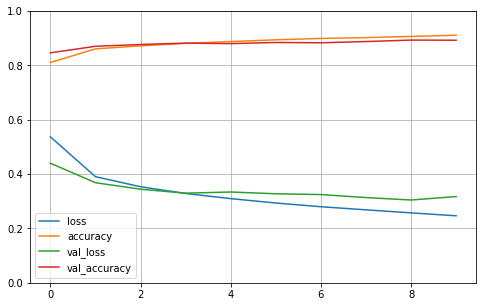

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [10]:
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - 0s 24us/sample - loss: 0.3503 - accuracy: 0.8749


[0.3503289178848267, 0.8749]